In [1]:
#Bring back the sun coursework
#168908
#Machine Learning coursework 
#This is the final submission
#I used the parameters found by the final grid search to do this rbf SVM
#interestingly, the initial grid search found 'poly' having better performance than 'rbf' but after adjusting other parameters rbf does slightly better
################################################################################################################################
#NOTE all commented out methods/models is in the addditional code folder, if you would like to take a look

In [2]:
#importing libraries
import numpy as np #for maths tools
import matplotlib.pyplot as plt  #plot chart
import pandas as pd #manage dataset
import csv #import csv files
from sklearn import preprocessing #preprocessing library from scikit-learn
from sklearn.preprocessing import Imputer #for missing data
from sklearn.svm import SVC #importing support vector machine
import pickle
from sklearn.model_selection import cross_val_score #for cross validation
from sklearn.preprocessing import StandardScaler #standardscalar
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [3]:
"""For Voting classifier, not used in final model
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression"""

'For Voting classifier, not used in final model\nfrom sklearn.ensemble import VotingClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.linear_model import LogisticRegression'

In [4]:
#importing the dataset/data files
dataset = pd.read_csv('training.csv')
additional_data = pd.read_csv('additional_training.csv')
confidence = pd.read_csv('annotation_confidence.csv')
testdata = pd.read_csv('testing.csv',delimiter = ',') 

In [5]:
#combining training and additional training together
combo_data = [dataset, additional_data]
#concate data
data = pd.concat(combo_data)

In [6]:
#preparing data
X = data.drop('prediction',axis=1)
X = X.drop('ID',axis=1)
#y is assigned to the predictions column
y = data['prediction']

In [7]:
imputer = Imputer(missing_values = 'NaN', strategy = 'mean') #for all missing values use the mean of the column
imputer = imputer.fit(X) #fit the imputer X to imputer
X = imputer.transform(X) #replace missing data with the mean of the column

In [8]:
#binarization, not used in final model
#X = preprocessing.Binarizer(threshold=0.4).transform(X)

In [9]:
#min max scalar not used in final model
#minmax_scalar = preprocessing.MinMaxScaler(feature_range=(0,1))
#X = minmax_scalar.fit_transform(X)

In [10]:
#PCA not used in the final model
#pca = PCA(n_components = 200) #using PCA
#pca.fit(X)
#X = pca.transform(X)

In [11]:
#Applying standardisation to dataset
scaler = StandardScaler() # using StandardScaler
scaler.fit_transform(X)  #apply the transformations to data

array([[ 1.46435323e+00, -2.93892271e-01,  1.18564181e+00, ...,
         4.04446764e-01,  5.71210690e-01,  1.51686567e+00],
       [-4.95232671e-01,  1.82271940e-01,  3.05579992e+00, ...,
         1.70236581e+00,  2.39747356e+00,  1.70836036e-01],
       [-4.95232671e-01, -5.46919833e-01, -2.90907644e-01, ...,
         1.15050773e+00,  1.12136676e+00,  2.49436867e-02],
       ...,
       [-4.11669009e-01, -5.13447181e-01, -2.90907644e-01, ...,
        -2.49269930e-16, -4.41059074e-01, -8.04001200e-01],
       [-9.81032711e-17, -5.46919833e-01, -2.90907644e-01, ...,
        -2.49269930e-16,  1.33523576e+00,  4.18406006e-01],
       [-4.95232671e-01, -5.46919833e-01, -2.90907644e-01, ...,
        -2.02908140e+00, -5.03226286e-16,  0.00000000e+00]])

In [12]:
#creating rbf svm classifier with the best parameters found by grid search
classifier = SVC(C=8, gamma= 0.003, kernel= 'rbf', class_weight = {0:0.6767, 1:0.3233}, verbose=True) 

In [13]:
#Voting Classifier not used in final model
#classifier = VotingClassifier(estimators =[('lr', LogisticRegression()),
#                                 ('rf', RandomForestClassifier()),
#                                 ('gnb', GaussianNB())], voting='hard')

In [14]:
classifier.fit(X,y,sample_weight = confidence["confidence"]) #fitting classifier to the training set

[LibSVM]

SVC(C=8, cache_size=200, class_weight={0: 0.6767, 1: 0.3233}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.003, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [15]:
#Saving my classification model 
pickle.dump(classifier,open('newModel',mode='wb'))
readSVM = pickle.load(open('newModel',mode='rb'))

In [16]:
testset = testdata.drop('ID',axis=1) #removing ID

In [17]:
scaler.fit(testset)
scaler.transform(testset)

array([[-0.32835688, -0.33554933, -0.28488627, ..., -0.53594634,
        -0.41282736,  0.23978562],
       [-0.32835688, -0.33554933, -0.28488627, ..., -0.50726708,
        -0.85766302, -0.64477125],
       [-0.32835688, -0.33554933, -0.28488627, ..., -0.15741894,
         0.41236401,  0.03591334],
       ...,
       [-0.32835688, -0.33554933, -0.28488627, ..., -0.78091772,
        -1.46764464, -1.39779346],
       [-0.32835688, -0.33554933, -0.28488627, ..., -1.6840749 ,
        -0.95235608, -1.13449979],
       [-0.32835688, -0.33554933, -0.28488627, ..., -0.11132496,
         0.33312588, -0.72512372]])

In [18]:
#testset = preprocessing.Binarizer(threshold=0.4).transform(testset)

In [19]:
#testset = minmax_scalar.fit_transform(testset)

In [20]:
#grabs newModel
svcModel = pickle.load(open('newModel',mode='rb'))

In [21]:
predictions = svcModel.predict(testset) #making predictions using the testset

In [22]:
#applying k-Fold Cross Validation
accuracies = cross_val_score(classifier, X, y, cv = 10, n_jobs = -1)

In [23]:
accuracies

array([0.72692308, 0.78461538, 0.75769231, 0.73076923, 0.76153846,
       0.76744186, 0.70155039, 0.73643411, 0.78294574, 0.72868217])

In [24]:
accuracies.mean()

0.7478592725104353

In [25]:
accuracies.std() # variance

0.025734336048062672

In [26]:
#create a list with all the predictions
csvList = []
csvList.append(["ID","prediction"])
for i in range(1,2819):
    csvList.append([i, predictions[i-1]])

In [27]:
csvList

[['ID', 'prediction'],
 [1, 1],
 [2, 1],
 [3, 1],
 [4, 0],
 [5, 0],
 [6, 1],
 [7, 0],
 [8, 1],
 [9, 1],
 [10, 1],
 [11, 0],
 [12, 1],
 [13, 1],
 [14, 1],
 [15, 1],
 [16, 1],
 [17, 0],
 [18, 1],
 [19, 0],
 [20, 1],
 [21, 0],
 [22, 1],
 [23, 1],
 [24, 1],
 [25, 1],
 [26, 0],
 [27, 1],
 [28, 0],
 [29, 0],
 [30, 1],
 [31, 1],
 [32, 1],
 [33, 1],
 [34, 1],
 [35, 1],
 [36, 0],
 [37, 1],
 [38, 0],
 [39, 1],
 [40, 1],
 [41, 1],
 [42, 0],
 [43, 1],
 [44, 1],
 [45, 1],
 [46, 0],
 [47, 1],
 [48, 0],
 [49, 0],
 [50, 1],
 [51, 1],
 [52, 1],
 [53, 0],
 [54, 1],
 [55, 0],
 [56, 1],
 [57, 1],
 [58, 1],
 [59, 1],
 [60, 1],
 [61, 0],
 [62, 0],
 [63, 0],
 [64, 1],
 [65, 1],
 [66, 1],
 [67, 0],
 [68, 1],
 [69, 0],
 [70, 1],
 [71, 1],
 [72, 1],
 [73, 0],
 [74, 0],
 [75, 0],
 [76, 1],
 [77, 1],
 [78, 0],
 [79, 1],
 [80, 0],
 [81, 1],
 [82, 1],
 [83, 1],
 [84, 1],
 [85, 1],
 [86, 1],
 [87, 0],
 [88, 1],
 [89, 1],
 [90, 1],
 [91, 1],
 [92, 0],
 [93, 1],
 [94, 1],
 [95, 1],
 [96, 1],
 [97, 1],
 [98, 0],
 [99, 

In [28]:
#creating csv file for kaggle submission
with open('SVMrbfBestPara.csv','w',newline='') as csvfile:
          submit = csv.writer(csvfile)
          submit.writerows(csvList)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

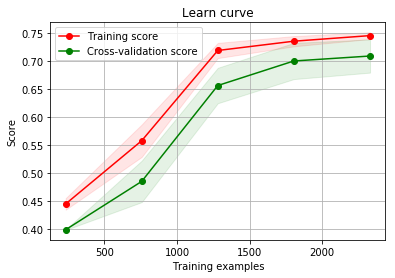

In [136]:
#Code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
#found it great to show the effect of training samples on the score for both train score and cross-validation
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(SVC(class_weight = {0:0.6767, 1:0.3233},verbose=True),'Learn curve', X,y,cv=10)